In [ ]:
# Which schools are best for math?
best_math_schools = schools[schools["average_math"] >= 640][["school_name", "average_math"]].sort_values("average_math", ascending=False)

# Calculate total_SAT per school
schools["total_SAT"] = schools["average_math"] + schools["average_reading"] + schools["average_writing"]

# Who are the top 10 performing schools?
top_10_schools = schools.groupby("school_name")["total_SAT"].mean().reset_index().sort_values("total_SAT", ascending=False).head(10)

# Which NYC borough has the highest standard deviation for total_SAT?
boroughs = schools.groupby("borough")["total_SAT"].agg(["count", "mean", "std"]).round(2)

# Filter for max std and reset index so borough is a column
largest_std_dev = boroughs[boroughs["std"] == boroughs["std"].max()]

# Rename the columns for clarity
largest_std_dev = largest_std_dev.rename(columns={"count": "num_schools", "mean": "average_SAT", "std": "std_SAT"})

# Colegios US

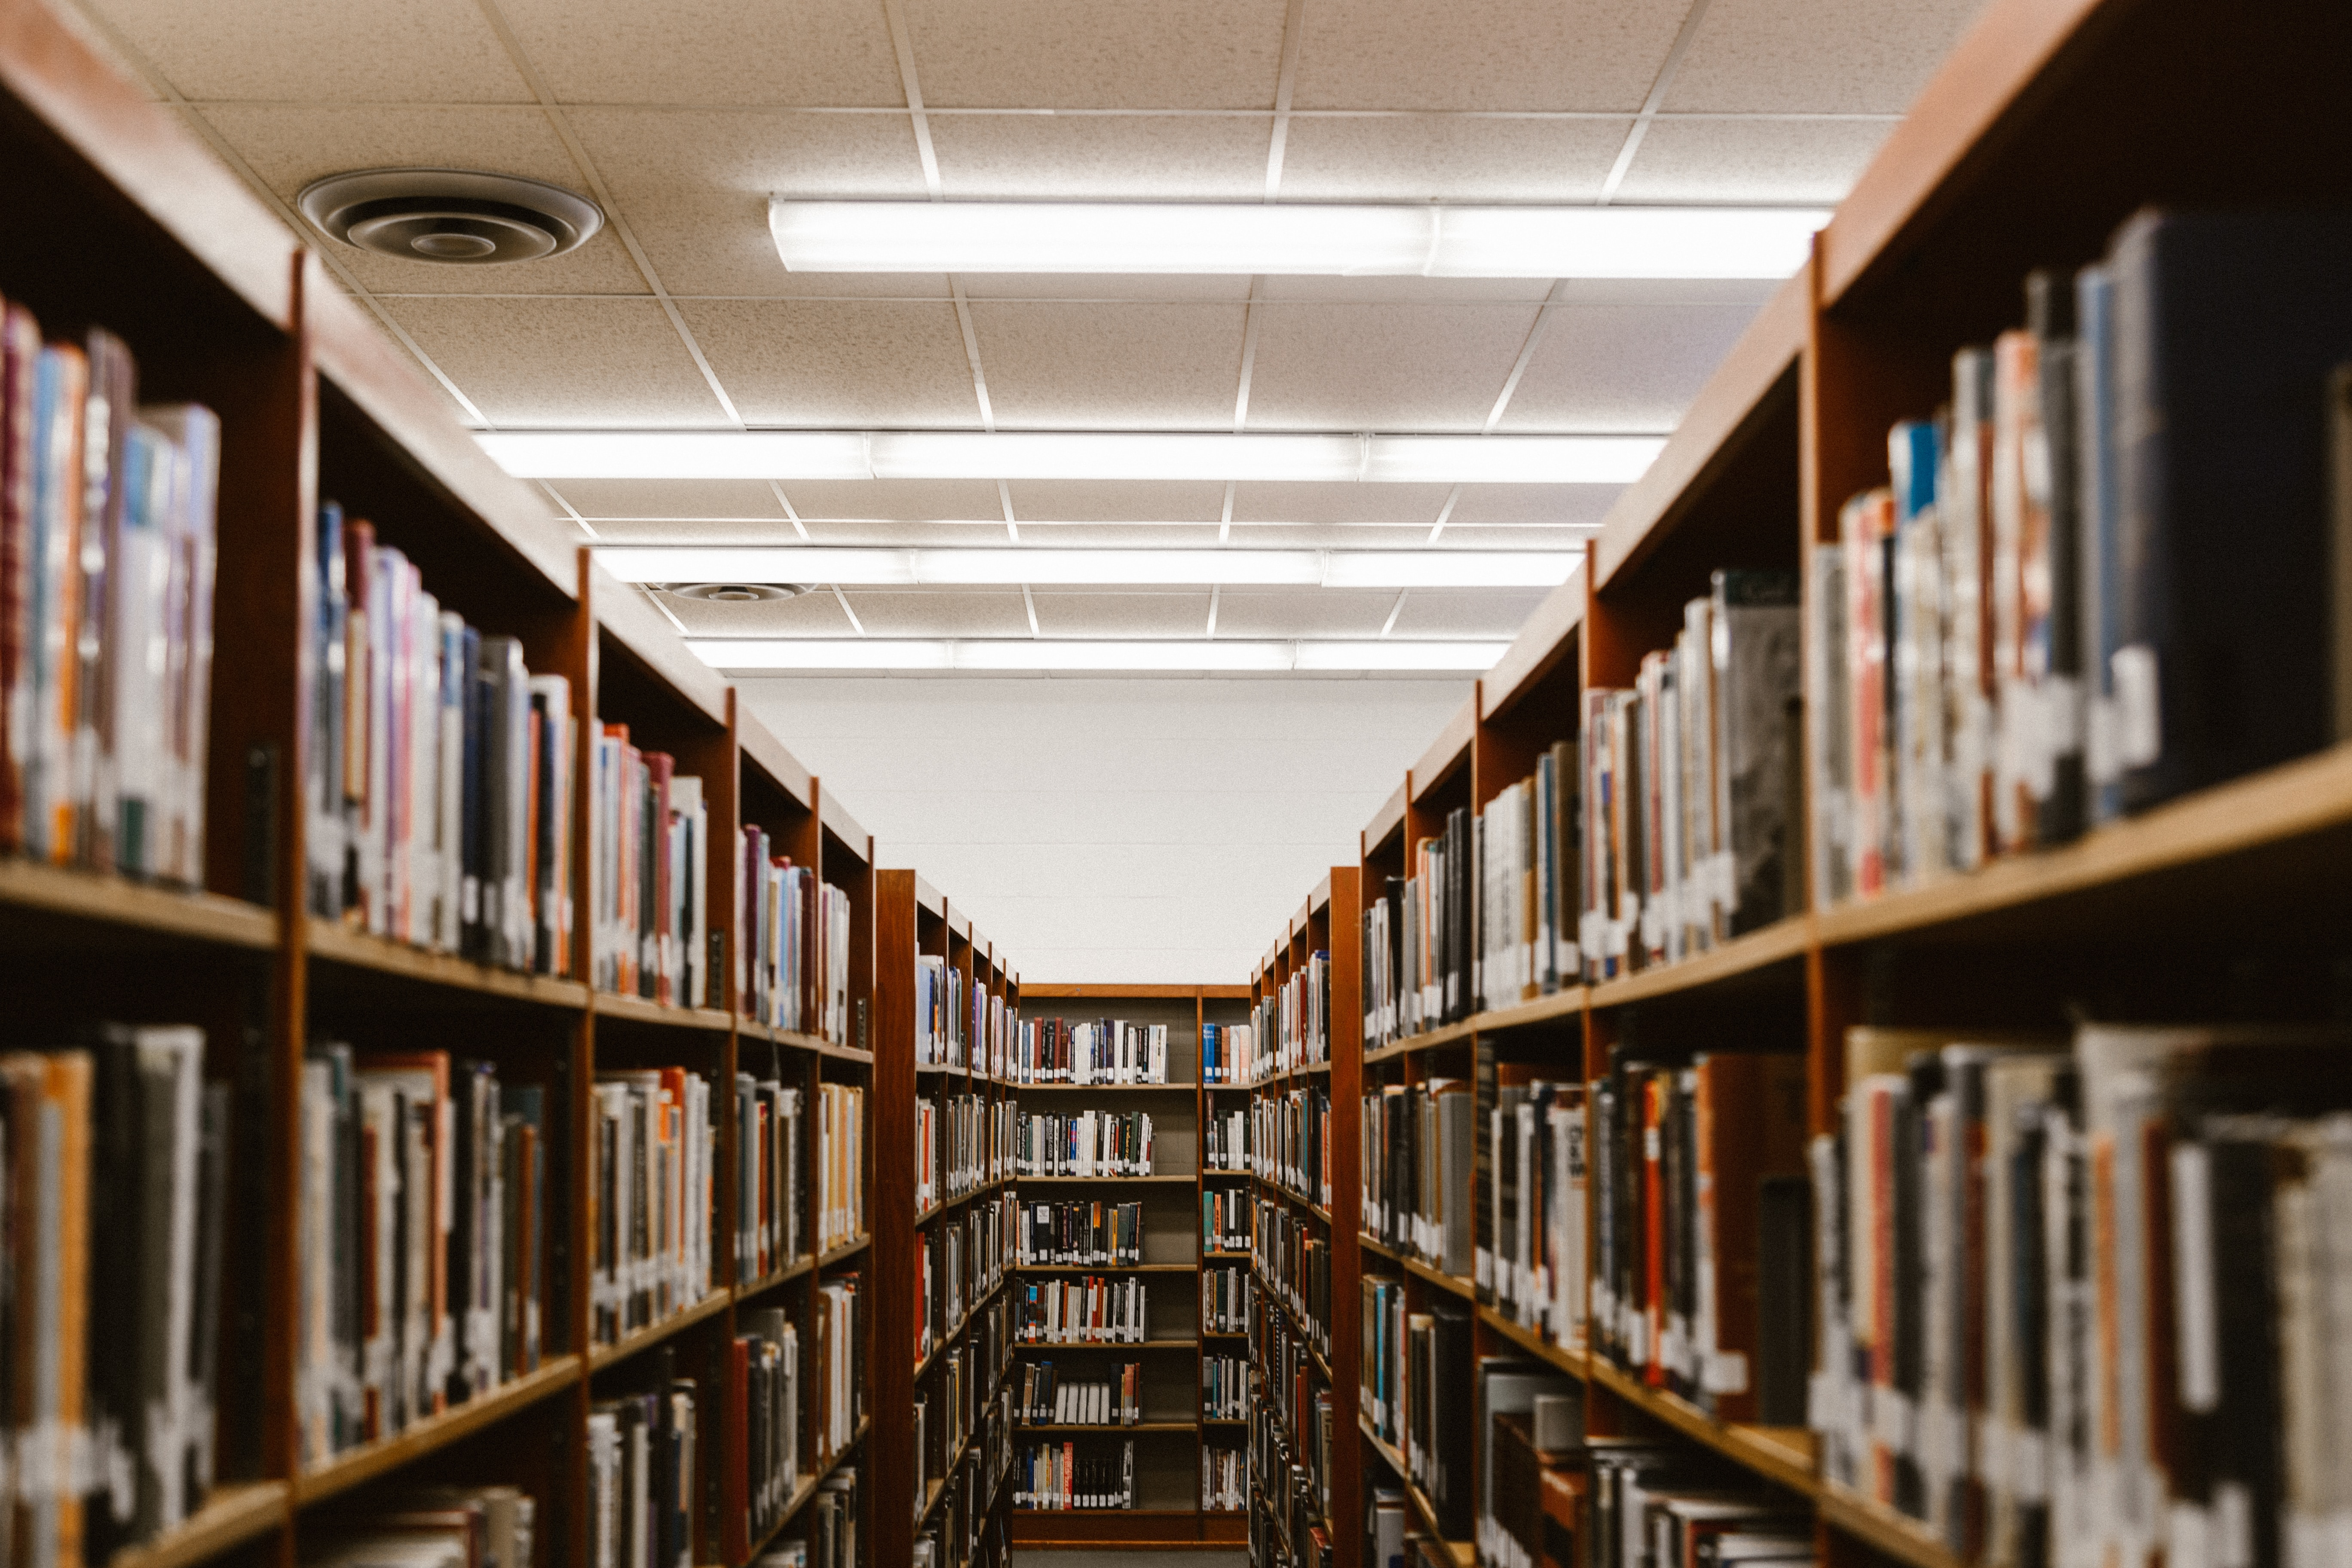

In [1]:
from IPython.display import Image
Image(filename='C:\\Creación de Contenido\\Python\\Imagenes\\col.jpg') # Reemplaza 'path_to_image.jpg' con la ruta a tu imagen

Foto de <a href="https://unsplash.com/es/@priscilladupreez?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Priscilla Du Preez 🇨🇦</a> en <a href="https://unsplash.com/es/fotos/fotografia-de-enfoque-superficial-de-estanterias-ggeZ9oyI-PE?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>
  

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a maximum score of 800 points. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

# Instrucciones

1. Create a pandas DataFrame called best_math_schools containing the "school_name" and "average_math" score for all schools where the results are at least 80% of the maximum possible score, sorted by "average_math" in descending order.

2. Identify the top 10 performing schools based on scores across the three SAT sections, storing as a pandas DataFrame called top_10_schools containing the school name and a column named "total_SAT", with results sorted by total_SAT in descending order.

3. Locate the NYC borough with the largest standard deviation for "total_SAT", storing as a DataFrame called largest_std_dev with "borough" as the index and three columns: "num_schools" for the number of schools in the borough, "average_SAT" for the mean of "total_SAT", and "std_SAT" for the standard deviation of "total_SAT". Round all numeric values to two decimal places.

In [3]:
import pandas as pd

In [4]:
schools = pd.read_csv("./Bases_Fuentes/schools.csv")
schools.head()

school_name    borough building_code  \
0  New Explorations into Science, Technology and ...  Manhattan          M022   
1                               Essex Street Academy  Manhattan          M445   
2                       Lower Manhattan Arts Academy  Manhattan          M445   
3    High School for Dual Language and Asian Studies  Manhattan          M445   
4      Henry Street School for International Studies  Manhattan          M056   

   average_math  average_reading  average_writing  percent_tested  
0           657              601              601             NaN  
1           395              411              387            78.9  
2           418              428              415            65.1  
3           613              453              463            95.9  
4           410              406              381            59.7

In [5]:
schools.shape

(375, 7)

In [6]:
schools.dtypes

school_name         object
borough             object
building_code       object
average_math         int64
average_reading      int64
average_writing      int64
percent_tested     float64
dtype: object

## Primer Punto

In [10]:
umbral80 = schools['average_math'].max() * 0.8

best_math_schools = schools[['school_name', 'average_math']]
best_math_schools = best_math_schools[best_math_schools['average_math'] >= umbral80].sort_values('average_math', ascending=False)

best_math_schools.head()

school_name  average_math
88                              Stuyvesant High School           754
170                       Bronx High School of Science           714
93                 Staten Island Technical High School           711
365  Queens High School for the Sciences at York Co...           701
68   High School for Mathematics, Science, and Engi...           683

## Segundo Punto

In [17]:
schools['total_SAT'] = schools['average_math'] + schools['average_reading'] + schools['average_writing']

top_10_schools = schools[['school_name', 'total_SAT']].sort_values('total_SAT', ascending=False)

top_10_schools.head(10)

school_name  total_SAT
88                              Stuyvesant High School       2144
170                       Bronx High School of Science       2041
93                 Staten Island Technical High School       2041
174  High School of American Studies at Lehman College       2013
333                        Townsend Harris High School       1981
365  Queens High School for the Sciences at York Co...       1947
5                       Bard High School Early College       1914
280                     Brooklyn Technical High School       1896
45                       Eleanor Roosevelt High School       1889
68   High School for Mathematics, Science, and Engi...       1889

## Tercer Punto

In [21]:
# Locate the NYC borough with the largest standard deviation for "total_SAT", storing as a DataFrame called largest_std_dev with "borough" as the index and three columns: "num_schools" for the number of schools in the borough, "average_SAT" for the mean of "total_SAT", and "std_SAT" for the standard deviation of "total_SAT". Round all numeric values to two decimal places.

largest_std_dev = schools.groupby('borough').agg({
    'school_name' : 'count',
    'total_SAT': ['mean', 'std'],
})

largest_std_dev.columns = ['No. Colegios', 'AVG SAT', 'Desviación Estandar SAT']

largest_std_dev.round(2)


No. Colegios  AVG SAT  Desviación Estandar SAT
borough                                                      
Bronx                    98  1202.72                   150.39
Brooklyn                109  1230.26                   154.87
Manhattan                89  1340.13                   230.29
Queens                   69  1345.48                   195.25
Staten Island            10  1439.00                   222.30

In [22]:
max_school_std = largest_std_dev[largest_std_dev["Desviación Estandar SAT"] == largest_std_dev["Desviación Estandar SAT"].max()]
max_school_std

No. Colegios      AVG SAT  Desviación Estandar SAT
borough                                                      
Manhattan            89  1340.134831                230.29414